In [2]:
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets # torchvision containe predefined datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np



In [9]:
# get training data

#torchvision.datasets.FashionMNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False)
'''
root (string) – Root directory of dataset where FashionMNIST/raw/train-images-idx3-ubyte and FashionMNIST/raw/t10k-images-idx3-ubyte exist.

train (bool, optional) – If True, creates dataset from train-images-idx3-ubyte, otherwise from t10k-images-idx3-ubyte.

download (bool, optional) – If True, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.

transform (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop

target_transform (callable, optional) – A function/transform that takes in the target and transforms it.

'''
training_data = datasets.FashionMNIST(root="data", train=True,
                                      download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False,
                                      download=True, transform=ToTensor())

11.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

49.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

86.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



119.3%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [17]:
# https://pytorch.org/vision/stable/_modules/torchvision/datasets/mnist.html#FashionMNIST
# get class names and convert it into a dict

classes = datasets.FashionMNIST.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Coat


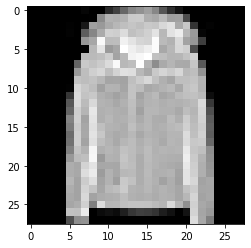

In [22]:
img,label = training_data[np.random.randint(low=0, high=len(training_data))]
print( classes[label])
plt.imshow(img.squeeze(), cmap="gray")


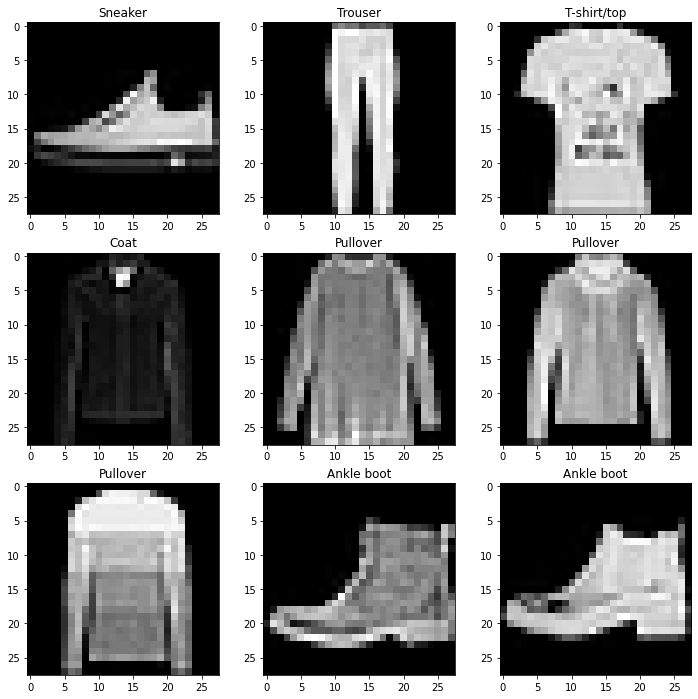

In [27]:
# show some more examples of the data
figure = plt.figure(figsize=(12,12))
# show 9 examples
rows = columns = 3
for i in range(rows* columns):
    img, label = training_data[np.random.randint(low=0, high=len(training_data))]
    figure.add_subplot(rows, columns, i +1)
    plt.title(classes[label])
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()

In [28]:
# to select a batch size from thre data to train we can use dataloader
'''
dataset (Dataset) – dataset from which to load the data.

batch_size (int, optional) – how many samples per batch to load (default: 1).

shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).

sampler (Sampler or Iterable, optional) – defines the strategy to draw samples from the dataset. Can be any Iterable with __len__ implemented. If specified, shuffle must not be specified.

batch_sampler (Sampler or Iterable, optional) – like sampler, but returns a batch of indices at a time. Mutually exclusive with batch_size, shuffle, sampler, and drop_last.

num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

collate_fn (callable, optional) – merges a list of samples to form a mini-batch of Tensor(s). Used when using batched loading from a map-style dataset.

pin_memory (bool, optional) – If True, the data loader will copy Tensors into CUDA pinned memory before returning them. If your data elements are a custom type, or your collate_fn returns a batch that is a custom type, see the example below.

drop_last (bool, optional) – set to True to drop the last incomplete batch, if the dataset size is not divisible by the batch size. If False and the size of dataset is not divisible by the batch size, then the last batch will be smaller. (default: False)

timeout (numeric, optional) – if positive, the timeout value for collecting a batch from workers. Should always be non-negative. (default: 0)

worker_init_fn (callable, optional) – If not None, this will be called on each worker subprocess with the worker id (an int in [0, num_workers - 1]) as input, after seeding and before data loading. (default: None)

generator (torch.Generator, optional) – If not None, this RNG will be used by RandomSampler to generate random indexes and multiprocessing to generate base_seed for workers. (default: None)

prefetch_factor (int, optional, keyword-only arg) – Number of samples loaded in advance by each worker. 2 means there will be a total of 2 * num_workers samples prefetched across all workers. (default: 2)

persistent_workers (bool, optional) – If True, the data loader will not shutdown the worker processes after a dataset has been consumed once. This allows to maintain the workers Dataset instances alive. (default: False)
'''

train_data = DataLoader(training_data, batch_size=64, shuffle=True)
test_data = DataLoader(test_data, batch_size=64, shuffle=True)


In [34]:
#each iteration of the dataloader will give a batch of data
trainingBatchImgs, trainingBatchLabels = next(iter(train_data))
print(trainingBatchImgs.shape, trainingBatchLabels.shape)
# now this can be passed to the network to generate labels


torch.Size([64, 1, 28, 28]) torch.Size([64])


torch.Size([1, 28, 28])
torch.Size([28, 28])
Ankle boot


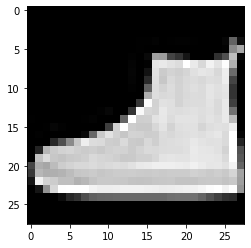

In [37]:
#
img = trainingBatchImgs[10] # take an image from the batch
print(img.shape)
print(img.squeeze().shape)
print(classes[trainingBatchLabels[10]])
plt.imshow(img.squeeze(),cmap="gray")
